# Network construction

In [3]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

if 'project_dir' not in globals():
  project_dir = pathlib.Path.cwd().parent
os.chdir(project_dir)

from src.network.cooccurrence import Cooccurrence

## Intentional vs random cooccurring

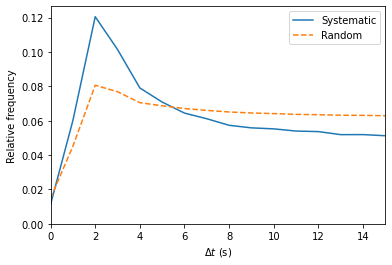

In [9]:
def density(x): 
  return np.bincount([codrive.timedelta.seconds for codrive in x]) / len(x)

systematic = pd.read_pickle('networks/16/cooccurrences.pkl')
random = pd.read_pickle('networks/16/randoms.pkl')

plt.plot(density(systematic), label="Systematic")
plt.plot(density(random), label="Random", ls='--')
plt.legend()

plt.xlabel(r"$\Delta t\ (\mathrm{s})$")
plt.xlim(0,15)

plt.ylabel("Relative frequency")
plt.ylim(0);

## Number of trucks between two co-driving trucks

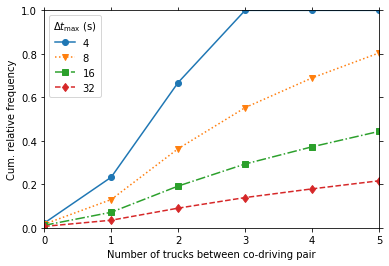

In [12]:
def norm(x): return np.bincount(x).cumsum() / len(x)

between = dict()
for Δt_max in [4, 8, 16, 32]:
    systematics = pd.read_pickle(f'networks/{Δt_max}/cooccurrences.pkl')
    between[Δt_max] = norm([cooccurence.timedelta.seconds for cooccurence in systematics])

plt.plot(np.append(between[4], [1, 1]), ls="-", marker="o", label=4)
plt.plot(between[8],  ls=":",  marker="v", label=8)
plt.plot(between[16], ls="-.", marker="s", label=16)
plt.plot(between[32], ls="--", marker="d", label=32)
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend(title=r"$\Delta t_\mathrm{max}\ \mathrm{(s)}$")
plt.xlabel("Number of trucks between co-driving pair")
plt.ylabel("Cum. relative frequency")
plt.tick_params(top=True, right=True)